<a href="https://colab.research.google.com/github/tanyasheru23/PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn ##nn contains all pytorch building blocks for neural networks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data - Prepraing and loading

Data can be almost anything ... in ML

*   Excel Sheet
*   Images of anykind
*   Videos
*   Audio
*   DNA
*   Text

Machine Learning consists of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

`Y = a + bX`

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
1. #Create *known* parameters
weight = 0.7 #b
bias = 0.3   #a

# Create
start=0
end=1
step = 0.02

#capital rep tensor and lower case a vector
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
One of the most imp concepts in ML for data

Lets create training ans test set with our data

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize our data


In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, testing data and compares prediction
  """
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training  Data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label ="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions,c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});

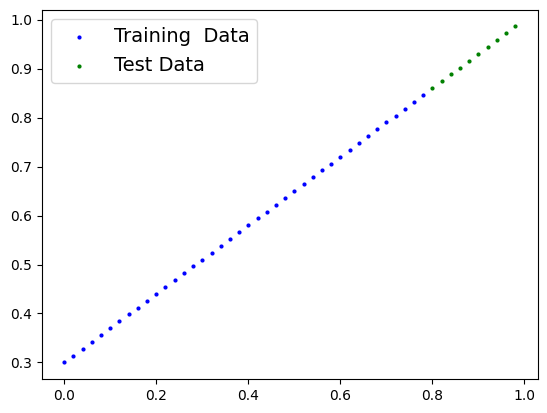

In [ ]:
plot_prediction()

## 2. Build Model


What our Model does?
* Start with random values
* Look at training data and adjust the random values to better represent (or get closer to) the ideal vlaues (the weight & bias values we used to create the data)


How does it do so?
Through 2 main algorithms:
1. Gradient descent → `req_grad = true`
2. Back Propogation

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
  # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__() #instantiate the super class i.e. here nn.Module

    # Initialize model Parameters
    # For bigger layers we may not init weights and biases,
    # we might init whole list of layers or whatever variables that we need our model to use

    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

    # Forward method to define the computation in the model (forward method is the operation that this module does)
    # any subclass of nn.module requires a forward method
  def forward(self, x:torch.Tensor) ->torch.Tensor: #<- "x" is the input data
    return self.weights*x + self.bias #this is the linear regression formula

## PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (a neural network can be considered as a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation

### Checking the contents of our PyTorch Model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# create a random seed

torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

`state_dict()` ⟶ A python dictionary that maps each layer to its parameter tensor

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run through the `forward()` method



In [ ]:
y_pred=model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

`torch.inference_mode()` ⟶ turnsoff gradient tracking and etc stuff in the background which are no longer useful for testing

Why use inference mode?

* To increase speed by reducing unnecessary computations.

* When we are doing inference, we are not training so we don't need to keep track of the updates.

* Not saving memory of whole bunch of data saves memory for large dataset

We can also do something similar with `torch.no_grad()`, however inference mode is preferred

In [ ]:
# Make predictions with model

with torch.inference_mode(): #turns off the grad tracking
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

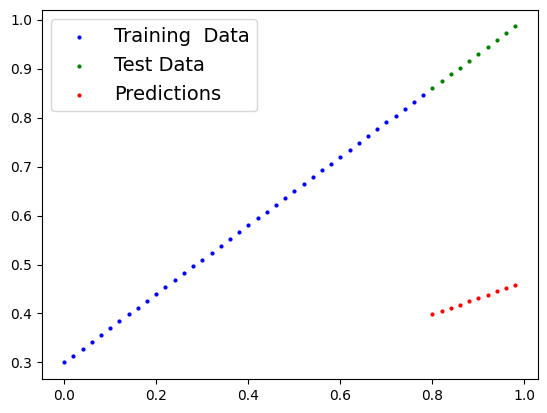

In [ ]:
plot_prediction(predictions=y_preds)

### 3. Train Model

The whole idea of training is for a model to move from some *unknow* parameters (these might be random) to some *known* parameters

Or in other words from poor representaion of the data to a better representation

One way to measure how poor or how wrong your predictions are to use loss functions

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss funtion

THINGS WE NEED TO TRAIN:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal output, lower is better.

* **Optimiser**: Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias) in our case to improve the loss funtion
  * Optimizer needs 2 parameters: `params` = `model.parameters` and `lr` = learning rate

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# set up a loss function
loss_fn = nn.L1Loss()

# set up an optimizer
optim = torch.optim.SGD(params = model_0.parameters(), lr = 0.001)

### Building a training loop in PyTorch

Things needed in a training loop
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - **Back propagation**
5. Optimizer step - use optimizer to adjust model's params to try and imporve the loss **Gradient Descent**

###Training Loop

`model.train()` ⟶ Train mode sets the params that require gradient to require gradient mode

`optimizer.zero_grad()` ⟶ zero the grads of the optimizer, because by default the grads are accumulated and so as to avoid the affect of past gradient in this iteration, we set it to zero

`optimizer.step()` ⟶ set optimizer to update the model's params w.r.t grad calculated by to the `loss.backward()` using back propogation


### Testing
`model.eval()` ⟶ Turnsoff the gradient tracking, drop_out, batch_norm etc stuff which are no longer needed for testing

`torch.inference_mode()` ⟶ turnsoff gradient tracking and etc stuff in the background which are no longer useful for testing.

In [ ]:
epochs = 2000

epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):

  # Set the traning mode
  model_0.train()

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  epoch_count.append(epoch)
  train_loss_values.append(loss.detach().numpy())

  # 3. Optimizer zero_grad
  optim.zero_grad()

  # 4. Back Propagation
  loss.backward()

  # 5. Gradient Descent (update the weights)
  optim.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    test_loss_values.append(test_loss)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train: loss {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())
    print()

Epoch: 0 | Train: loss 0.31288138031959534 | Test loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])

Epoch: 50 | Train: loss 0.2552763819694519 | Test loss: 0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])

Epoch: 100 | Train: loss 0.19767141342163086 | Test loss: 0.35847947001457214
OrderedDict([('weights', tensor([0.3761])), ('bias', tensor([0.2298]))])

Epoch: 150 | Train: loss 0.14006686210632324 | Test loss: 0.2911251187324524
OrderedDict([('weights', tensor([0.3956])), ('bias', tensor([0.2798]))])

Epoch: 200 | Train: loss 0.08973254263401031 | Test loss: 0.22795839607715607
OrderedDict([('weights', tensor([0.4150])), ('bias', tensor([0.3257]))])

Epoch: 250 | Train: loss 0.06476505100727081 | Test loss: 0.18208928406238556
OrderedDict([('weights', tensor([0.4330])), ('bias', tensor([0.3556]))])

Epoch: 300 | Train: loss 0.05357731133699417 | Test loss: 0.15086300671100616
OrderedDict([('we

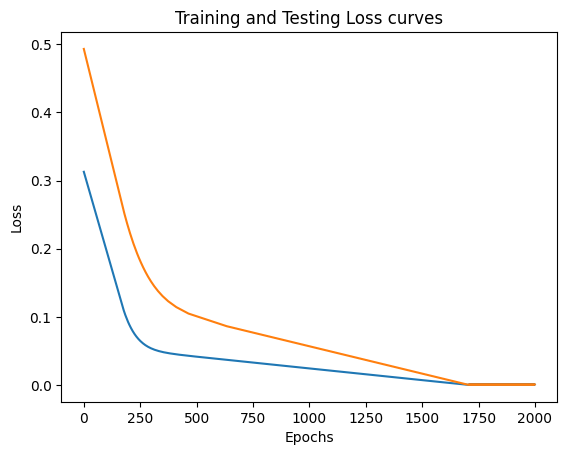

In [ ]:
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and Testing Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

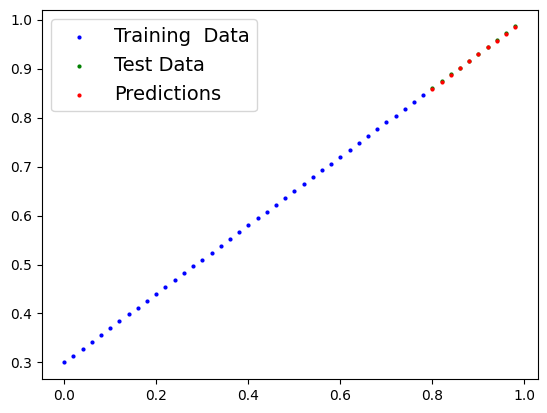

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_prediction(predictions=y_preds_new)

### Saving a model in PyTorch

There are 3 main methods - to save and load models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary (RECOMMENDED)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [ ]:
# Saving our PyTorch Model

from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model Save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth' # a common PyTorch conventions is to save models using either .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
print(f"Saving Model to {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar 17 08:43 01_pytorch_workflow_model_0.pth


We can do 2 things
* Save only the state_dict
* Save the entire model
Read and know which is recommended and why

## Loading a PyTorh MODEL

Since we saved our model's `state_dict()` rather the entire model, we will have to create and instance of the model class and load the saved `state_dict` into that.

In [ ]:
# To Load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(X_test)
loaded_model_pred

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  model_pred = model_0(X_test)
model_pred

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [ ]:
model_pred == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### PUTTING IT ALL TOGETHER
Let's go back through the steps above and see it all in one place

In [ ]:
# instantiate a new class to load the saved state_dict
loaded_model_0 = LinearRegressionModel()

print(f"Params before loading: {loaded_model_0.state_dict()}\n")
# now load the state_dict and update the new instance with new params
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"Params after loading: {loaded_model_0.state_dict()}")

Params before loading: OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])

Params after loading: OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])


In [ ]:
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1) # it creates params and biases in the background

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
epochs = 150

epoch_count = []
train_losses = []
test_losses = []
for epoch in range(epochs):

  #training
  model_1.train()
  y_pred = model_1.forward(X_train) # forward pass
  loss = loss_fn(y_pred, y_train)   # calculate the loss
  optim.zero_grad()                 # optimizer zero grad
  loss.backward()                   # back propogation
  optim.step()                      # update the params

  # testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1.forward(X_test)
    test_loss = loss_fn(test_pred, y_test)

  epoch_count.append(epoch)
  train_losses.append(loss.detach().numpy())
  test_losses.append(test_loss.detach().numpy())

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}\n")
    print(model_1.state_dict())

Epoch: 0 | Training Loss: 0.5551779866218567 | Testing Loss: 0.5739762187004089

OrderedDict([('linear_layer.weight', tensor([[0.7606]])), ('linear_layer.bias', tensor([0.8200]))])
Epoch: 20 | Training Loss: 0.3247582018375397 | Testing Loss: 0.30455657839775085

OrderedDict([('linear_layer.weight', tensor([[0.6826]])), ('linear_layer.bias', tensor([0.6200]))])
Epoch: 40 | Training Loss: 0.09433844685554504 | Testing Loss: 0.03513689711689949

OrderedDict([('linear_layer.weight', tensor([[0.6046]])), ('linear_layer.bias', tensor([0.4200]))])
Epoch: 60 | Training Loss: 0.0199567973613739 | Testing Loss: 0.04580312222242355

OrderedDict([('linear_layer.weight', tensor([[0.6025]])), ('linear_layer.bias', tensor([0.3410]))])
Epoch: 80 | Training Loss: 0.013089170679450035 | Testing Loss: 0.029944902285933495

OrderedDict([('linear_layer.weight', tensor([[0.6366]])), ('linear_layer.bias', tensor([0.3265]))])
Epoch: 100 | Training Loss: 0.006215679459273815 | Testing Loss: 0.0140867112204432

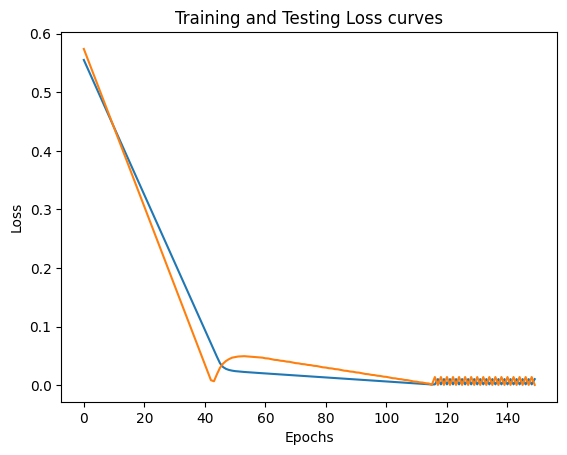

In [ ]:
plt.plot(epoch_count, train_losses, label = "Train Loss")
plt.plot(epoch_count, test_losses, label = "Test Loss")
plt.title("Training and Testing Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

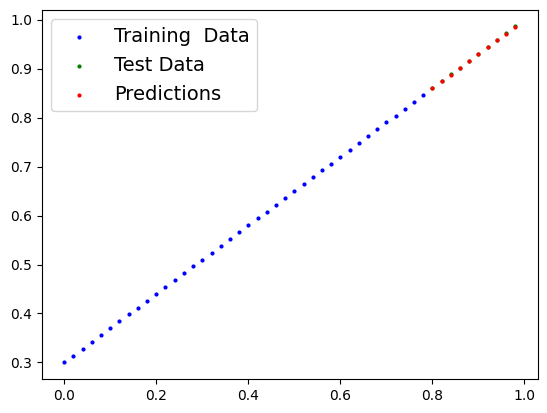

In [ ]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)
plot_prediction(predictions=y_preds_new)

In [ ]:
MODEL_NAME_1 = '01_pytorch_workflow_model_1.pth'

MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME_1

print(f"Saving model_1 state_dict to: {MODEL_SAVE_PATH_1}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH_1)

Saving model_1 state_dict to: models/01_pytorch_workflow_model_1.pth


In [ ]:
loaded_model_1 = LinearRegressionModelv2()

print(f"Params before loading saved model: {loaded_model_1.state_dict()}")
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH_1))
print(f"Params after  loading saved model: {loaded_model_1.state_dict()}")

Params before loading saved model: OrderedDict([('linear_layer.weight', tensor([[-0.2343]])), ('linear_layer.bias', tensor([0.9186]))])
Params after  loading saved model: OrderedDict([('linear_layer.weight', tensor([[0.6968]])), ('linear_layer.bias', tensor([0.3025]))])


In [ ]:
y_pred_loaded = loaded_model_1(X_test)
y_pred_loaded == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])